In [33]:
import os
import json

log_file = [] 
with open('nohup.out') as f:
    log_file.append(f.readlines())

In [34]:
log_file = log_file[0]

In [35]:
result = []
for i in log_file:
    if 'LOSS train' in i or 'ACC train' in i or 'Result of EPOCH' in i:
        result.append(i.strip())

In [36]:
len(result)


90

In [37]:
result_dic = {}
for i in range(0, len(result), 3):
    epoch = result[i].split(' ')[-1]
    temp = {}
    
    # LOSS
    loss = result[i+1].split(' ')
    temp['loss'] = {'train': loss[2], 'valid': loss[4]}
    # ACC
    acc = result[i+1].split(' ')
    temp['acc'] = {'train': acc[2], 'valid': acc[4]}

    result_dic[epoch] = temp
    # result_dic[]
    # print([result[i], result[i+1], result[i+2]])

In [43]:
for k,v in logdata.items():
    feeds[k] = v

In [44]:
logfile = '202303031735_epoch30.json'
logdata = result_dic
feeds = []
if not os.path.isfile(logfile):
    with open(logfile, 'w') as f:
        json.dump(logdata, f)
else:
    with open(logfile) as feedsjson:
        feeds = json.load(feedsjson)
    for k,v in logdata.items():
        feeds[k] = v
    with open(logfile, mode='w') as f:
        f.write(json.dumps(feeds, indent=2))

[0.728, 0.7138, 0.7003, 0.6712, 0.6578, 0.6389, 0.6384, 0.6299, 0.6513, 0.6321, 0.6259, 0.6222, 0.6073, 0.6323, 0.6036, 0.623, 0.6168, 0.6388, 0.6178, 0.629, 0.6294, 0.6066, 0.6172, 0.6259, 0.624, 0.6354, 0.636, 0.6417, 0.6174, 0.6544]


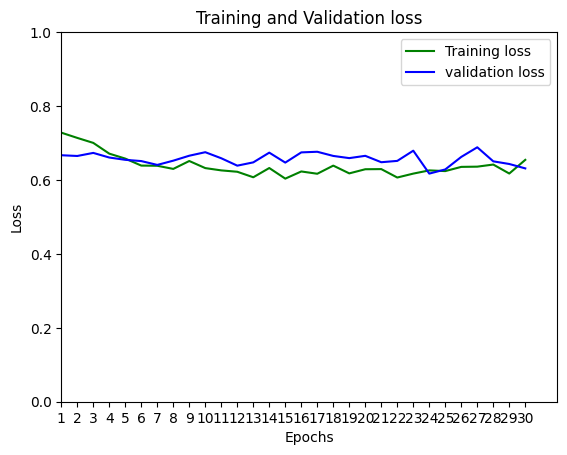

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    epochs.append(k)
    # print(v['loss'])
    loss_train.append(round(float(v['loss']['train']), 4))
    loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0,31])
plt.ylim([0, 1])
plt.legend()
plt.show()
